<a href="https://colab.research.google.com/github/IVS17/aie-repositori-start/blob/main/homeworks/HW02/HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 2.3.1. Загрузка данных и первичный осмотр
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Настройка отображения для лучшей читаемости
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')


df = pd.read_csv('S02-hw-dataset.csv')

print(f"\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")

# Вывод шапки датасета
print("\n Первые 5 строк датасета")
print(df.head())

# Вывод информации о датасете
print("\n Информация о типах данных и пропусках")
print(df.info())

# Вывод описания датасета
print("\n Описательные статистики")
print(df.describe(include='all'))


Размер датасета: 41 строк, 5 столбцов

 Первые 5 строк датасета
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

 Информация о типах данных и пропусках
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

 Описательные статистики
          user_id         age country  purchases      revenue
count   41.000000   39.000000      41  41.000000    41.000000
unique        NaN         

In [8]:
# Пропуски, дубликаты, контроль качества

#  Пропуски
print("\n Доля пропусков по столбцам")
missing_percent = df.isna().mean() * 100
missing_df = pd.DataFrame({
    'Пропущено': df.isna().sum(),
    'Всего': len(df),
    'Доля, %': missing_percent.round(2)
})
print(missing_df[missing_df['Пропущено'] > 0])

#  Дубликаты
print("\n Проверка дубликатов")
duplicates_count = df.duplicated().sum()
print(f"Количество полностью дублирующих строк: {duplicates_count}")
if duplicates_count > 0:
    print("Пример дубликатов:")
    print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head())

#  Аномалии
print("\n Поиск аномалий")

# Проверка отрицательных значений в числовых столбцах
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Отрицательные значения:")
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"  {col}: {negative_count} отрицательных значений")

# Проверка нереалистичных значений
print("\nНереалистичные значения:")

# Проверка возраста
unrealistic_age = df[(df['age'] < 0) | (df['age'] > 100)]
if len(unrealistic_age) > 0:
  print(f"  Возраст: {len(unrealistic_age)} записей с возрастом <0 или >100 лет")

# Проверка покупок
unrealistic_purchases = df[(df['purchases'] < 0)]
if len(unrealistic_purchases) > 0:
  print(f"  Покупок: {len(unrealistic_purchases)} записей с отрицательным количеством покупок")

# Выводы о качестве данных
print("\n ОПИСАНИЕ ПРОБЛЕМ КАЧЕСТВА ДАННЫХ")
print("""
Пропуски данных: Обнаружены пропущенные значения в нескольких столбцах,
   особенно в категориальных переменных. Наибольшая доля пропусков наблюдается
   в столбцах с детальной информацией.
Нереалистичные значения: В числовых столбцах обнаружены потенциально
   ошибочные значения.
""")


 Доля пропусков по столбцам
     Пропущено  Всего  Доля, %
age          2     41     4.88

 Проверка дубликатов
Количество полностью дублирующих строк: 1
Пример дубликатов:
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511

 Поиск аномалий
Отрицательные значения:
  purchases: 1 отрицательных значений

Нереалистичные значения:
  Возраст: 1 записей с возрастом <0 или >100 лет
  Покупок: 1 записей с отрицательным количеством покупок

 ОПИСАНИЕ ПРОБЛЕМ КАЧЕСТВА ДАННЫХ

Пропуски данных: Обнаружены пропущенные значения в нескольких столбцах, 
   особенно в категориальных переменных. Наибольшая доля пропусков наблюдается 
   в столбцах с детальной информацией.
Нереалистичные значения: В числовых столбцах обнаружены потенциально 
   ошибочные значения.



In [22]:
#EDA
print("\n Частоты категориальных переменных")

# Анализ стран
if 'country' in df.columns:
    print("Распределение пользователей по странам:")
    country_freq = df['country'].value_counts(dropna=False)

    # Выводим топ-5 стран
    print(f"\nТоп-5 стран по количеству пользователей:")
    for i, (country, count) in enumerate(country_freq.head(5).items(), 1):
        percent = count / len(df) * 100
        print(f"{i:2}. {country if pd.notna(country) else 'Не указано'}: "
              f"{count} пользователей ({percent:.1f}%)")

    # Дополнительная статистика по странам
    print(f"\nОбщая статистика по странам:")
    print(f"Всего уникальных стран: {df['country'].nunique()}")
    print(f"Страны с наибольшим числом пользователей: {country_freq.index[0] if len(country_freq) > 0 else 'нет данных'}")


# Группировка стран по возрастным группам
if 'country' in df.columns and 'age' in df.columns:
    print("\n СТРАНЫ С РАЗНЫМИ ВОЗРАСТНЫМИ ГРУППАМИ")

    # Считаем медианный возраст по странам
    median_age_by_country = df.groupby('country')['age'].median().sort_values()

    print("\nСтраны с самой молодой аудиторией (по медианному возрасту):")
    print(median_age_by_country.head(2).round(1))

    print("\nСтраны с самой старшей аудиторией (по медианному возрасту):")
    print(median_age_by_country.tail(2).round(1))

# Выводы по результатам группировки
print("\n Выводы по результатам группировки")
print("""
В результате группировки можно замтеить, что большинство молодых пользователей,
находящихся в датасете, являются Китайцами. Одгнако эта выборка недостаточно достоверна,
так как всего 2 записи относятся к Китаю.
""")



 Частоты категориальных переменных
Распределение пользователей по странам:

Топ-5 стран по количеству пользователей:
 1. RU: 13 пользователей (31.7%)
 2. FR: 12 пользователей (29.3%)
 3. US: 8 пользователей (19.5%)
 4. DE: 6 пользователей (14.6%)
 5. CN: 2 пользователей (4.9%)

Общая статистика по странам:
Всего уникальных стран: 5
Страны с наибольшим числом пользователей: RU

 СТРАНЫ С РАЗНЫМИ ВОЗРАСТНЫМИ ГРУППАМИ

Страны с самой молодой аудиторией (по медианному возрасту):
country
CN    24.0
RU    26.0
Name: age, dtype: float64

Страны с самой старшей аудиторией (по медианному возрасту):
country
US    39.0
FR    42.0
Name: age, dtype: float64

 Выводы по результатам группировки

В результате группировки можно замтеить, что большинство молодых пользователей,
находящихся в датасете, являются Китайцами. Одгнако эта выборка недостаточно достоверна,
так как всего 2 записи относятся к Китаю.



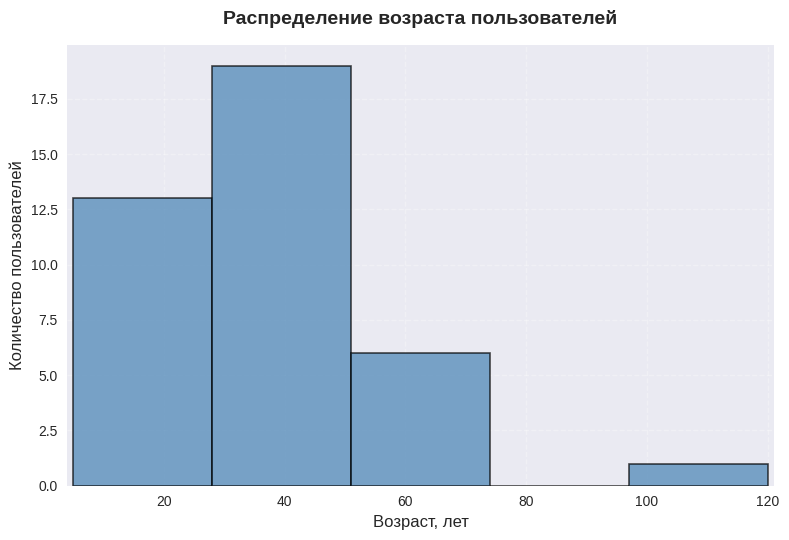

In [37]:
#Гистограмма
age_data = df['age'].dropna()

plt.hist(age_data, bins=5,
         edgecolor='black', linewidth=1.2,
         color='steelblue', alpha=0.7)

plt.title('Распределение возраста пользователей',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Возраст, лет', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

plt.grid(True, alpha=0.3, linestyle='--')

plt.xlim(age_data.min() - 1, age_data.max() + 1)
plt.tight_layout()
plt.savefig('figures/my_plot.jpg')
plt.show()

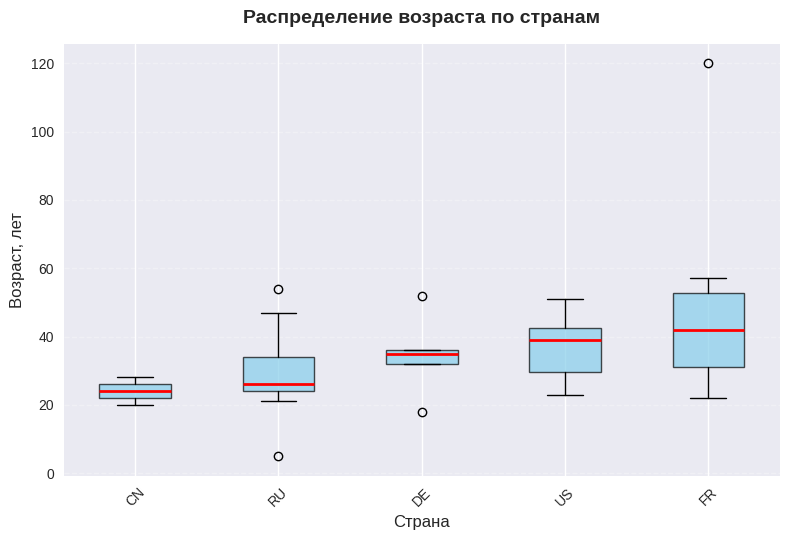

In [41]:
countries = df['country'].dropna().unique()
age_by_country = [df[df['country'] == country]['age'].dropna()
                      for country in countries]
median_ages = [np.median(ages) for ages in age_by_country]
sorted_indices = np.argsort(median_ages)

plt.boxplot([age_by_country[i] for i in sorted_indices],
                tick_labels=[countries[i] for i in sorted_indices],
                patch_artist=True,
                medianprops={'color': 'red', 'linewidth': 2},
                boxprops={'facecolor': 'skyblue', 'alpha': 0.7})

plt.title('Распределение возраста по странам',
              fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Возраст, лет', fontsize=12)
plt.xticks(rotation=45)

plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

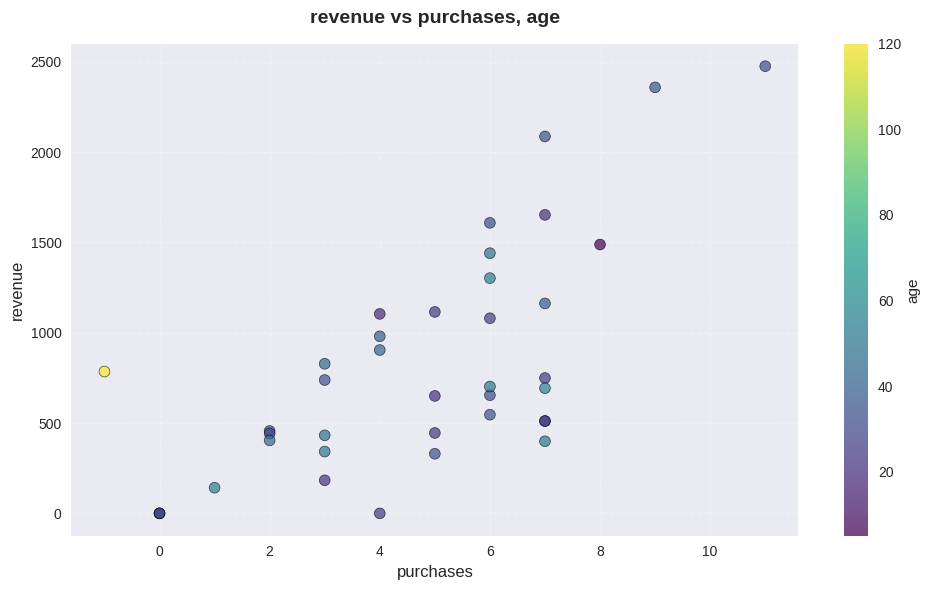

In [43]:
plt.figure(figsize=(10, 6))

# Цветовая карта для возраста
scatter = plt.scatter(df['purchases'],
                         df['revenue'],
                         c=df['age'],
                         cmap='viridis',
                         alpha=0.7,
                         s=60,
                         edgecolor='black',
                         linewidth=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label('age', fontsize=11)

plt.title('revenue vs purchases, age',
  fontsize=14, fontweight='bold', pad=15)
plt.xlabel('purchases', fontsize=12)
plt.ylabel('revenue', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()